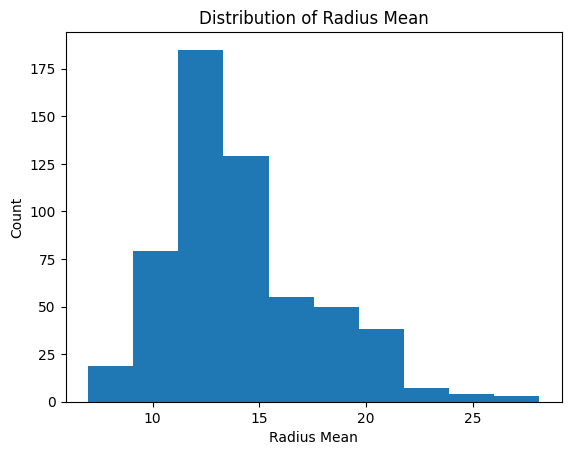

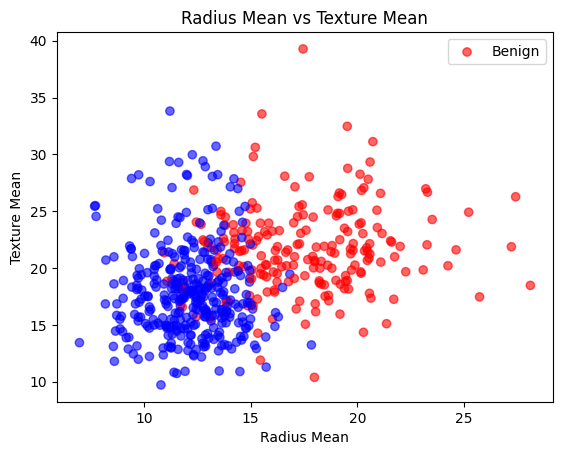

Enter radius_mean: 14.8
Enter texture_mean:17.55
Benign


In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Load the data
df = pd.read_csv('/content/3. Predict Disease Outcome Based on Genetic and Clinical Data.csv')

# 2. Quick cleanup
df = df.drop(columns=['id', 'Unnamed: 32']).dropna()

# 3. Encode the diagnosis: malignant = 1, benign = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 4. Plot 1: Histogram of “radius_mean”
plt.hist(df['radius_mean'])
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

# 5. Plot 2: Scatter “radius_mean” vs “texture_mean”, color by diagnosis
colors = df['diagnosis'].map({0: 'blue', 1: 'red'})
plt.scatter(df['radius_mean'], df['texture_mean'], c=colors, alpha=0.6)
plt.title('Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(['Benign', 'Malignant'])
plt.show()

# --- Model Training ---
features = ['radius_mean', 'texture_mean']
X = df[features]
y = df['diagnosis']
model = LogisticRegression()
model.fit(X, y)

# --- Prediction Function ---
aa=float(input("Enter radius_mean: "))
bb=float(input("Enter texture_mean:"))
def predict_tumor(radius, texture):
    """
    Predicts tumor type given radius_mean & texture_mean.
    Returns 'Malignant' or 'Benign'.
    """
    return 'Malignant' if model.predict([[radius, texture]])[0] else 'Benign'

print(predict_tumor(aa,bb))
